Context of the Data Set: 

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Alternative name for Parkinsons Disease - Progressive Supranuclear Palsy (PSP)

Project Objective: 

1. Load the data set
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)
3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? 8. How does regularization help? (20 points)
9. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

The data consists of those diagnosed with Parkinson Disease and those who do not.

Attribute Information of the Data Set:

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
6. measures of variation in fundamental frequency
7. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
8. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
9. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
10. RPDE,D2 - Two nonlinear dynamical complexity measures
11. DFA - Signal fractal scaling exponent
12. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
##Note : DecisionTree - Strings cannot be used as input for the step model fit

import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
##Training set and test set-  X and y dataframes 

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import LabelEncoder
##To encode categorical features & feature scalling

from sklearn import metrics
from sklearn.metrics import classification_report
##Calculate accuracy measures and confusion matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
#k-NN Model Library

#Logistic Regression Library 
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection
#Model selection Library

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
#mlxtend Library for feature selection

from sklearn.naive_bayes import GaussianNB
#Naive Bayes Library 


## Load the data set
It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [2]:
psp_df = pd.read_csv('parkinsons.data')

In [3]:
psp_df.head(15)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
psp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
psp_df.shape

(195, 24)

In [6]:
psp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## Note:
- Spread1 - values are negative 
- High Standard Deviation columns : 
    -MDVP:Fo(Hz)
    -MDVP:Fhi(Hz)
    -MDVP:Flo(Hz) 
    
-The distribution is positively skewed. Hence data needs to be scaled to ensure neutral impact. 

In [7]:
#Validating values in the dataframe
for column in psp_df.columns:
    print("Atrribute & Value = %s - %s"%(column, psp_df[column].unique()[:10]))

Atrribute & Value = name - ['phon_R01_S01_1' 'phon_R01_S01_2' 'phon_R01_S01_3' 'phon_R01_S01_4'
 'phon_R01_S01_5' 'phon_R01_S01_6' 'phon_R01_S02_1' 'phon_R01_S02_2'
 'phon_R01_S02_3' 'phon_R01_S02_4']
Atrribute & Value = MDVP:Fo(Hz) - [119.992 122.4   116.682 116.676 116.014 120.552 120.267 107.332  95.73
  95.056]
Atrribute & Value = MDVP:Fhi(Hz) - [157.302 148.65  131.111 137.871 141.781 131.162 137.244 113.84  132.068
 120.103]
Atrribute & Value = MDVP:Flo(Hz) - [ 74.997 113.819 111.555 111.366 110.655 113.787 114.82  104.315  91.754
  91.226]
Atrribute & Value = MDVP:Jitter(%) - [0.00784 0.00968 0.0105  0.00997 0.01284 0.00333 0.0029  0.00551 0.00532
 0.00505]
Atrribute & Value = MDVP:Jitter(Abs) - [7.0e-05 8.0e-05 9.0e-05 1.1e-04 3.0e-05 6.0e-05 2.0e-05 4.0e-05 5.0e-05
 1.0e-05]
Atrribute & Value = MDVP:RAP - [0.0037  0.00465 0.00544 0.00502 0.00655 0.00463 0.00155 0.00144 0.00293
 0.00268]
Atrribute & Value = MDVP:PPQ - [0.00554 0.00696 0.00781 0.00698 0.00908 0.0075  0.00202 0.0

##psp_df = pd.read_csv('parkinsons.data', names = ["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"])

Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

## Bivariate Analysis 

In [8]:
psp_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Graphical representation

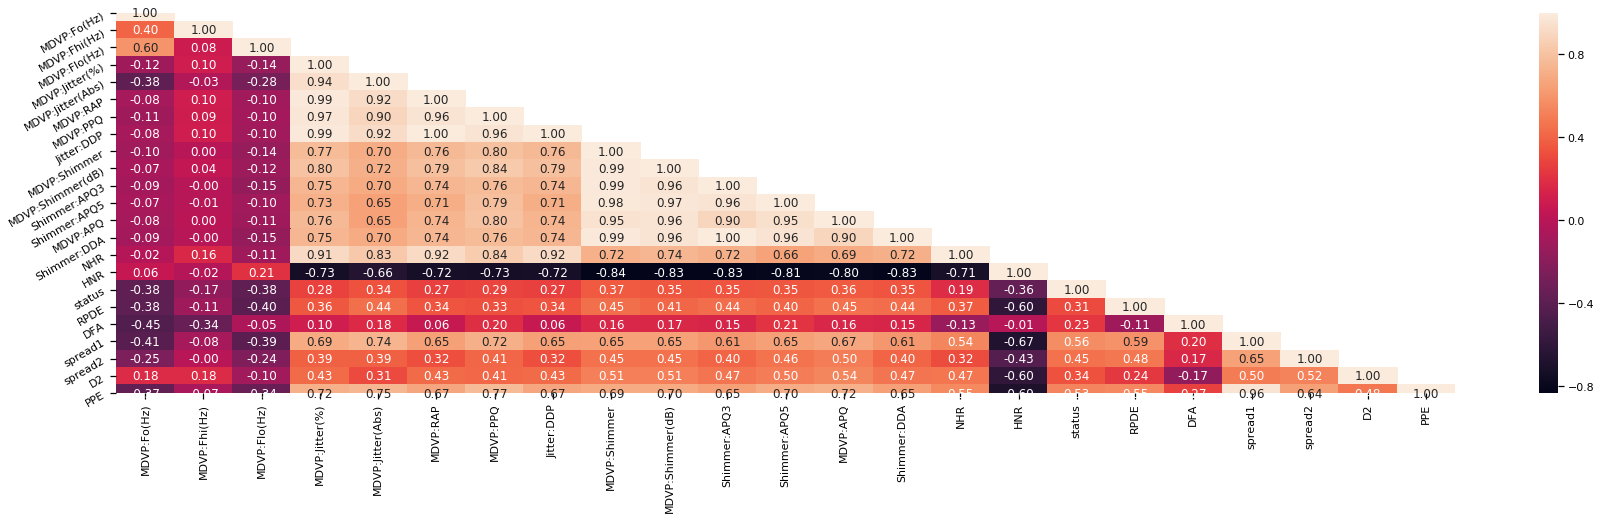

In [9]:
corr = psp_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(30,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [10]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in 
                       list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    print(df.sort_values(by='corr',ascending=False))
corrank(psp_df)

                            pairs      corr
177   (Shimmer:APQ3, Shimmer:DDA)  1.000000
101        (MDVP:RAP, Jitter:DDP)  1.000000
66   (MDVP:Jitter(%), Jitter:DDP)  0.990276
64     (MDVP:Jitter(%), MDVP:RAP)  0.990276
152   (MDVP:Shimmer, Shimmer:DDA)  0.987626
..                            ...       ...
190           (Shimmer:APQ5, HNR) -0.813753
179           (Shimmer:APQ3, HNR) -0.827123
209            (Shimmer:DDA, HNR) -0.827130
167       (MDVP:Shimmer(dB), HNR) -0.827805
154           (MDVP:Shimmer, HNR) -0.835271

[253 rows x 2 columns]


### Note

Following Attributes are highly correlated  - correlation > 90% & < 100%.
- (MDVP:Jitter(%), Jitter:DDP)
- (MDVP:Jitter(%), MDVP:RAP)  
- (MDVP:Shimmer, Shimmer:DDA)  
- (MDVP:Shimmer, Shimmer:APQ3)  
- (MDVP:Shimmer(dB), MDVP:APQ)  
- (Shimmer:APQ5, Shimmer:DDA)  
- (Shimmer:APQ3, Shimmer:APQ5)  
- (MDVP:PPQ, Jitter:DDP)  
- (MDVP:RAP, MDVP:PPQ)  
- (MDVP:Shimmer, MDVP:APQ)  
- (Shimmer:APQ5, MDVP:APQ)  
- (MDVP:Jitter(Abs), MDVP:RAP)  
- (Jitter:DDP, NHR)  
- (MDVP:RAP, NHR)  
- (MDVP:Jitter(%), MDVP:Jitter(Abs))  
- (MDVP:Jitter(Abs), Jitter:DDP)  
- (MDVP:Shimmer, MDVP:Shimmer(dB))  
- (MDVP:Shimmer, Shimmer:APQ5) 
- (MDVP:Jitter(%), MDVP:PPQ)  
- (MDVP:Shimmer(dB), Shimmer:APQ5)  
- (MDVP:Shimmer(dB), Shimmer:DDA)  
- MDVP:Shimmer(dB), Shimmer:APQ3) 
- (spread1, PPE)  
- (MDVP:Jitter(%), NHR)


(Shimmer:APQ3, Shimmer:DDA) and (MDVP:RAP, Jitter:DDP) - 100% correlation 

In [11]:
## correlation against the target attribute
psp_df.corr()['status']

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

#Note:
1. status is moderately corelated with spread1 & PPE 
2. status has low corelation to spread2 & MDVP:F0(Hz)

In [ ]:
sns.distplot(psp_df[psp_df['status'] == 0]['spread1'], color = 'B')
sns.distplot(psp_df[psp_df['status'] == 1]['spread1'], color = 'Y')

In [ ]:
sns.distplot(psp_df[psp_df['status'] == 0]['spread2'], color = 'B')
sns.distplot(psp_df[psp_df['status'] == 1]['spread2'], color = 'Y')

In [ ]:
sns.distplot(psp_df[psp_df['status'] == 0]['PPE'], color = 'G')
sns.distplot(psp_df[psp_df['status'] == 1]['PPE'], color = 'R')

## Univariate Analysis 

In [ ]:
psp_df.skew()

##Skewness is greater than 1- data is highly sckewed
##Skewness is between -0.5 and 0.5 - fairly symmetrical

In [ ]:
sns.distplot(psp_df['PPE'],bins=30)

In [ ]:
sns.distplot(psp_df['D2'],bins=30)

In [ ]:
sns.distplot(psp_df['spread2'],bins=30)

In [ ]:
sns.distplot(psp_df['spread1'],bins=30)

In [ ]:
sns.distplot(psp_df['DFA'],bins=30)

In [ ]:
sns.distplot(psp_df['RPDE'],bins=30)

In [ ]:
sns.distplot(psp_df['HNR'],bins=30)

In [ ]:
sns.distplot(psp_df['NHR'],bins=30)

In [ ]:
sns.distplot(psp_df['Shimmer:DDA'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:APQ'],bins=30)

In [ ]:
sns.distplot(psp_df['Shimmer:APQ5'],bins=30)

In [ ]:
sns.distplot(psp_df['Shimmer:APQ3'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Shimmer(dB)'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Fo(Hz)'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Jitter(Abs)'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Shimmer'],bins=30)

In [ ]:
sns.distplot(psp_df['Jitter:DDP'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:PPQ'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:RAP'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Jitter(%)'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Flo(Hz)'],bins=30)

In [ ]:
sns.distplot(psp_df['MDVP:Fhi(Hz)'],bins=30)

## Split the data set into training and test set in the ratio of 70:30 (Training:Test)
Target Column - "status"

In [ ]:
train_char_label = ['No', 'Yes']

In [ ]:
features = psp_df.loc[:, psp_df.columns != 'status'].values[:, 1:]
labels = psp_df.loc[:, 'status'].values

scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  psp_df.drop("status", axis=1)
y =  psp_df.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)


## Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [ ]:
dt_model.fit(train_set, train_labels)

Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [ ]:
dt_model.score(test_set , test_labels)      # performance on test data

In [ ]:
print("Test accuracy: ",dt_model.score(test_set , test_labels))   # performance on test data

In [ ]:
predicted_test_labels = dt_model.predict(test_set)

predicted_test_labels

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels,predicted_test_labels)

conf_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('parkinsons_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

Next step is to copy the script in the .dot file and paste it at http://webgraphviz.com/ to view the tree and determine the max_depth.

max_depth value =4

In [ ]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dt_model_reg.fit(train_set, train_labels)

In [ ]:
credit_tree_regularized = open('parkinsons_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model_reg, out_file= credit_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model_reg.feature_importances_, columns = ["Imp"], index = train_set.columns))

In [ ]:
dt_model.score(train_set , train_labels)    # performance on train data

In [ ]:
dt_model.score(test_set , test_labels)      # performance on test data

In [ ]:
print("Test Accuracy:",dt_model_reg.score(test_set , test_labels))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(train_set, train_labels)

In [ ]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

In [ ]:
n_estimators = range(5, 100, 5)
a=[]
b=[]
for est in n_estimators:
    rfcl = RandomForestClassifier(n_estimators = est)
    rfcl = rfcl.fit(train_set, train_labels)
    test_pred = rfcl.predict(test_set)
    score =rfcl.score(test_set , test_labels)
    print("Estimator %i with score: %r" % (est, score))
    a.append(est)
    b.append(score)
    
print("Estimators: ",a)
print("Accuracy Score: ",b) 
plt.plot(a,b,'b') 
plt.show()

The above graph shows the accuracy score against the n_estimator values; 
For the n_estimator values between 20 and 30 the accuracy score is maximum (between the range of 90 - 94%). 
we will estimate the number of trees between 20-30

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=17, max_samples=.7)
#bgcl = BaggingClassifier(n_estimators=9 , max_samples=.7)
bgcl = bgcl.fit(train_set, train_labels)

In [ ]:
test_pred = bgcl.predict(test_set)
print("Test accuracy: ",bgcl.score(test_set , test_labels))

In [ ]:
rom sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 10)
abcl = abcl.fit(train_set, train_labels)

In [ ]:
test_pred = abcl.predict(test_set)
print("Test accuracy: ",abcl.score(test_set , test_labels))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [ ]:
test_pred = gbcl.predict(test_set)
print("Test accuracy: ",gbcl.score(test_set , test_labels))